# AUTOLIB ELECTRIC CAR-SHARING COMPANY
>HYPOTHESIS TESTING

# Defining the Question

## a) Specifying the Data Analytic Question

Given two randomly chosen Postal Codes, is the average number of Bluecars taken during weekdays different in the two Postal Codes?

Null Hypothesis(Ho): μ(taken weekday|Postal_Code1) = μ(taken weekday|Postal_Code2)

Alternate Hypothesis(Ha): μ(taken weekday|Postal_Code1) ≠ μ(taken weekday|Postal_Code2)

where μ is the mean number of cars taken during weekdays, Postal_Code1 and Postal_Code2 are the two randomly chosen postcodes from the dataset

## b) Defining the Metric for Success

The metric of succes is either accepting or rejecting the null hypothesis

# 1)Reading the Data

## Importing our Libraries

In [2]:
# import pandas
import pandas as pd

# importing numpy
import numpy as np

# importing matplotlib.pyplot
import matplotlib.pyplot as plt

# importing scipy.stats
import scipy.stats as stats

# importing seaborn
import seaborn as sns

## Loading our dataset

In [4]:
# load our autolib csv dataset
autolib_df = pd.read_csv('autolib_daily_events_postal_code.csv')
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# 2)Checking the data

## Preview bottom of dataset

In [5]:
# preview bottom of our dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## Preview dataset shape

In [6]:
# preview number of records in the dataset
print("The data has " + str(autolib_df.shape[0]) + " rows and " + str(autolib_df.shape[1]) + " columns.")

The data has 16085 rows and 13 columns.


## Checking the columns

In [7]:
# checking the columns 
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

## Preview dataset information/data types

In [8]:
# check information of the dataset
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# 3)Tidying the Dataset

## Drop irrelevant columns

In [10]:
# dropping unnecessary columns
autolib_df.drop(autolib_df.iloc[:, 2:5], inplace = True, axis = 1) 
autolib_df.drop(autolib_df.iloc[:, 3:], inplace = True, axis = 1) 
autolib_df.head()

,Postal code,date,BlueCars_taken_sum
0,75001,1/1/2018,110
1,75001,1/2/2018,98
2,75001,1/3/2018,138
3,75001,1/4/2018,104
4,75001,1/5/2018,114


## Set column names to be uniform

In [11]:
#tidying the column names
autolib_df.columns = autolib_df.columns.str.lower().str.replace(' ','_')
autolib_df.head()

,postal_code,date,bluecars_taken_sum
0,75001,1/1/2018,110
1,75001,1/2/2018,98
2,75001,1/3/2018,138
3,75001,1/4/2018,104
4,75001,1/5/2018,114


In [51]:
# checking number of postal codes
# 
n = len(pd.unique(autolib_df['postal_code']))
  
print("No of unique postal codes:", 
      n)

No.of.unique postal codes: 104


## Convert date to index and drop date column

In [12]:
#converting the date to datetime and making it an index
#set date as index
autolib_df.set_index(autolib_df.date, drop=True,inplace=True)
autolib_df.head()

#convert the index to datetimeIndex
autolib_df.index = pd.to_datetime(autolib_df.index)
autolib_df

#drop date column
autolib_df.drop('date', axis=1, inplace=True)
autolib_df.head()

,postal_code,bluecars_taken_sum
date,,
2018-01-01,75001,110
2018-01-02,75001,98
2018-01-03,75001,138
2018-01-04,75001,104
2018-01-05,75001,114


In [13]:
autolib_df.dtypes

postal_code           int64
bluecars_taken_sum    int64
dtype: object

## Checking for outliers and Anomalies

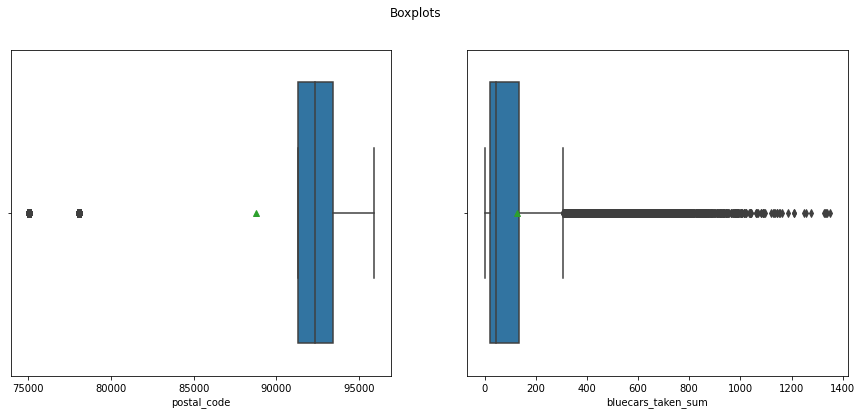

In [14]:
# Checking for Outliers & Anomalies
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = autolib_df['postal_code'], ax=ax1, showmeans = True)
sns.boxplot(x = autolib_df['bluecars_taken_sum'], ax=ax2, showmeans = True)
plt.show()

The values considered outliers in the Postal Code are valid codes (just a difference in the number of digits that is causing them to appear so).
In the the case of blue cars taken, it is possible to have a high number too while a low number on the days cars not taken. With that in mind, we shall not exclude them (No dropping of records).

## Identifying missing data

In [15]:
# Identifying the Missing Data
#
autolib_df.isnull().any()

postal_code           False
bluecars_taken_sum    False
dtype: bool

# 4)Simple Random Sampling

## Create an array of postal codes

In [16]:
# creating an array of postal codes and sorting them
Postal_codes = np.sort(autolib_df.postal_code.unique())
Postal_codes

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

## Select 2 random Postal Codes

In [26]:
#Select the data to only 2 randomly selected Postal Codes:
import random
#setting a seed so that all the code can be run and give the same results
random.seed(2)
print ("Choosing 2 random Postal Codes ",random.sample(list(Postal_codes), k=2))

Choosing 2 random Postal Codes  [75008, 75012]


## Set the dataset to only the 2 selected PostalCodes

In [27]:
# Set the dataset to only the two randomly selected Postal Codes 75008 and 75012
postal_code1 = 75008
postal_code2 = 75012
autolib_blue = autolib_df.loc[(autolib_df['postal_code'] == postal_code1) | (autolib_df['postal_code'] == postal_code2)] 
autolib_blue.head()


,postal_code,bluecars_taken_sum
date,,
2018-01-01,75008,309
2018-01-02,75008,349
2018-01-03,75008,422
2018-01-04,75008,430
2018-01-05,75008,426


# 5)Exploratory Analysis

## Univariate Analysis

The analysis will be conducted collectively for the two random samples selected.

### Measures of Central Tendency 

In [31]:
# Basic descriptive statistics for the numerical columns
autolib_blue.describe()

,postal_code,bluecars_taken_sum
count,312.000000,312.000000
mean,75010.000000,467.368590
std,2.003213,103.003959
min,75008.000000,21.000000
25%,75008.000000,414.000000
50%,75010.000000,454.500000
75%,75012.000000,499.250000
max,75012.000000,816.000000


In [34]:
#Measures of central tendency and dispersion
#Blue cars taken in 75008 and 75012
print(f'Min: {autolib_blue.bluecars_taken_sum.min()}')
print(f'Q1: {autolib_blue.bluecars_taken_sum.quantile(.25)}')
print(f'Q2: {autolib_blue.bluecars_taken_sum.quantile(.50)}')
print(f'Q3: {autolib_blue.bluecars_taken_sum.quantile(.75)}')
print(f'Max: {autolib_blue.bluecars_taken_sum.max()}')
print('*'*15)

print(f'Mean: {autolib_blue.bluecars_taken_sum.mean()}')
print(f'Median: {autolib_blue.bluecars_taken_sum.median()}')
print(f'Mode: {autolib_blue.bluecars_taken_sum.mode().values[0]}')
print('*'*15)

print(f'Skew: {autolib_blue.bluecars_taken_sum.skew()}')
print(f'Kurtosis: {autolib_blue.bluecars_taken_sum.kurt()}')

Min: 21
Q1: 414.0
Q2: 454.5
Q3: 499.25
Max: 816
***************
Mean: 467.3685897435897
Median: 454.5
Mode: 414
***************
Skew: -0.02022352284717942
Kurtosis: 4.093482829279084



1.  From our analysis the the skewness is negative , the data are negatively skewed
2.  From our analysis the kurtosis is >3 which means it is leptokurtic



### Visualizations

#### Count plot

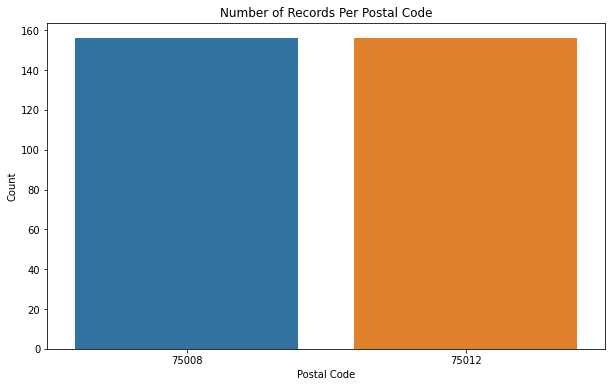

In [32]:
# Count plot for the number of records per postal code
plt.figure(figsize=(10,6))
sns.countplot(x = 'postal_code', data=autolib_blue)
plt.title('Number of Records Per Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.show()

In [33]:
# Number of blue cars taken per postal code
autolib_blue['postal_code'].value_counts()

75012    156
75008    156
Name: postal_code, dtype: int64

#### Histogram

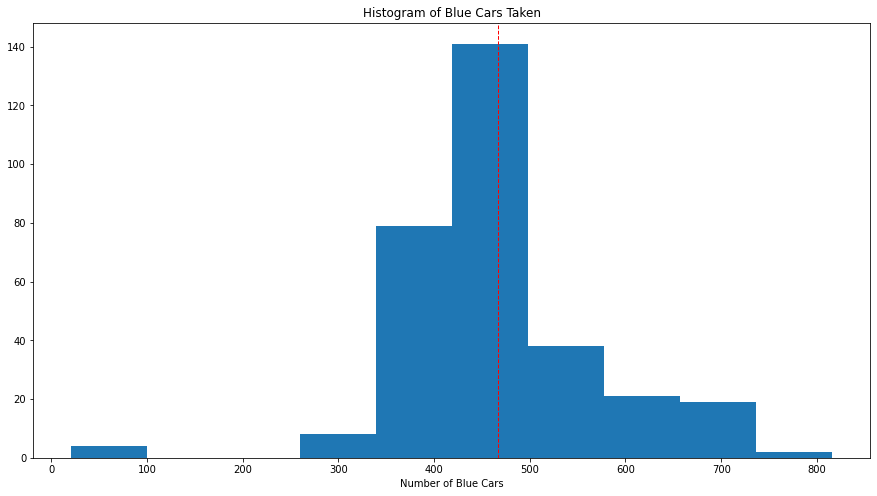

In [35]:

#Histogram of the distribution of the records of blue cars taken (Approximately normal) with the mean (redline)
plt.figure(figsize=(15,8))
plt.hist(autolib_blue['bluecars_taken_sum'])
plt.axvline(autolib_blue.bluecars_taken_sum.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Blue Cars Taken')
plt.xlabel('Number of Blue Cars')
plt.show()

## Bivariate Analysis

### Scatter Plot

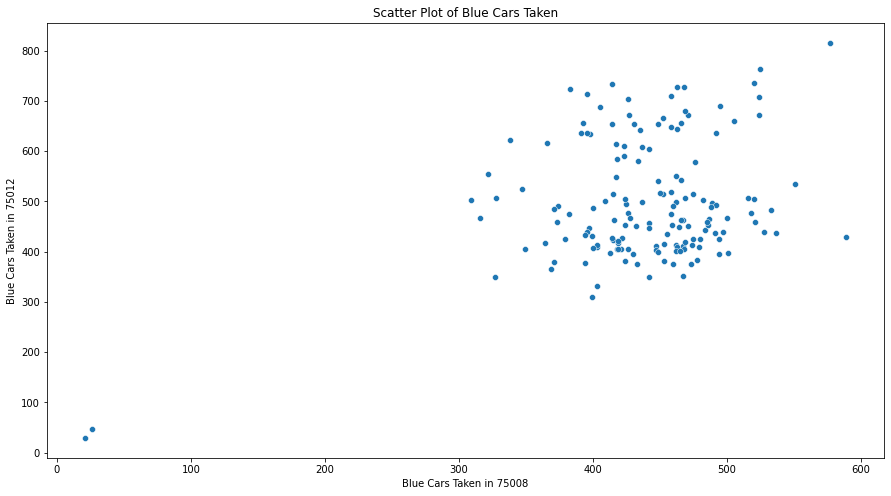

In [37]:
#grouping records by postal code to compare the relationship between them in regards to blue cars taken
df_p1 = autolib_blue[autolib_blue['postal_code']== postal_code1]
df_p2 = autolib_blue[autolib_blue['postal_code']== postal_code2]

#plotting the scatter plot to show relationship between the 2 postal codes
plt.figure(figsize=(15,8))
sns.scatterplot(x = df_p1['bluecars_taken_sum'], y = df_p2['bluecars_taken_sum'])
plt.title('Scatter Plot of Blue Cars Taken')
plt.xlabel('Blue Cars Taken in 75008')
plt.ylabel('Blue Cars Taken in 75012')
plt.show()

As can be seen above the relationship seems like a positive linear one. As more cars are taken in Postal Code 75008, so too are they taken in 75012. Observed is also the two outliers near the zero mark, this may point to an issue that could be further explored to reveal possible reasons.

### Correlation

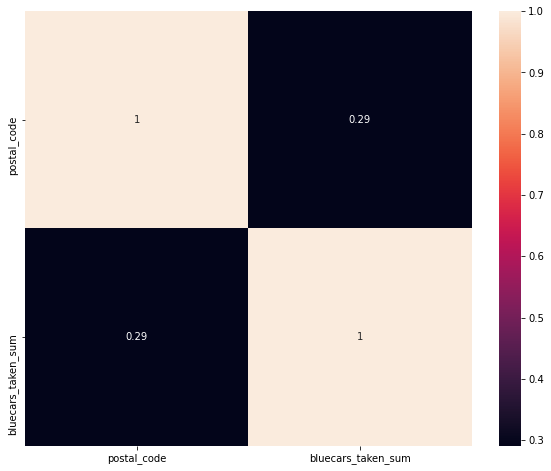

In [38]:
#checking correlations
plt.figure(figsize=(10,8))
sns.heatmap(autolib_blue.corr(),annot=True)
plt.show()

> The above figure confirms that theres an average correlation between postal code and the number of blue cars taken.

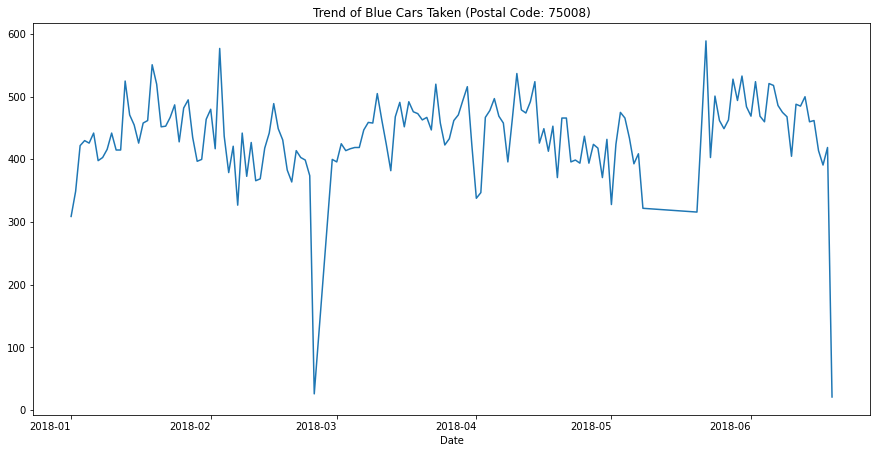

In [39]:
#plotting the blue cars taken from 75008
plt.figure(figsize=(15,8))
df_p1['bluecars_taken_sum'].plot()
plt.title('Trend of Blue Cars Taken (Postal Code: 75008)')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.show()

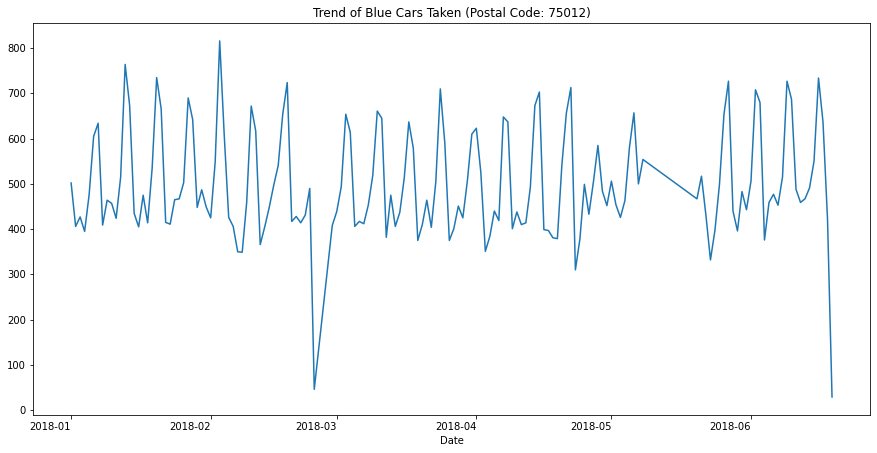

In [40]:
#plotting the blue cars taken from 75012
plt.figure(figsize=(15,8))
df_p2['bluecars_taken_sum'].plot()
plt.title('Trend of Blue Cars Taken (Postal Code: 75012)')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.show()

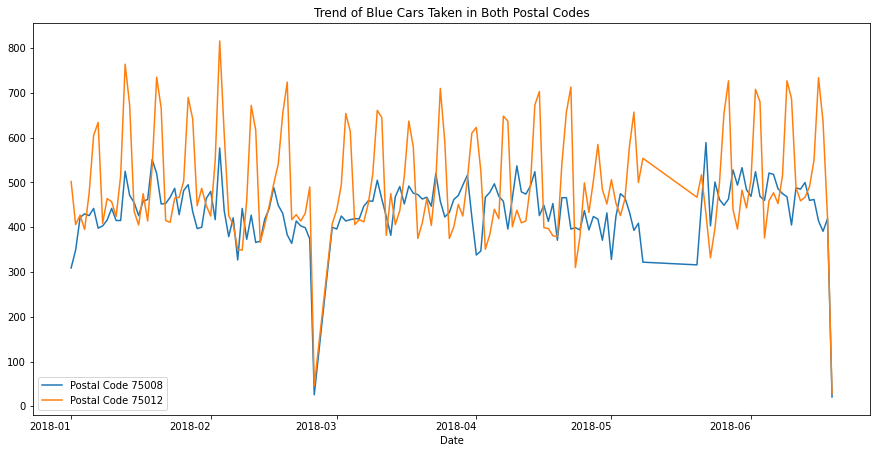

In [41]:
#plotting both postal codes together to compare trends
plt.figure(figsize=(15,8))
ax = df_p1['bluecars_taken_sum'].plot()
df_p2['bluecars_taken_sum'].plot(ax=ax)
plt.title('Trend of Blue Cars Taken in Both Postal Codes')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.legend(['Postal Code 75008', 'Postal Code 75012'], loc='lower left');
plt.show()

It is clear that both of the subsets of the data follow an almost identical trend.
Another thing to note is that we can see that Postal Code 75012 has clearly a higher number of cars taken compared to 75008. 

### Pairplot

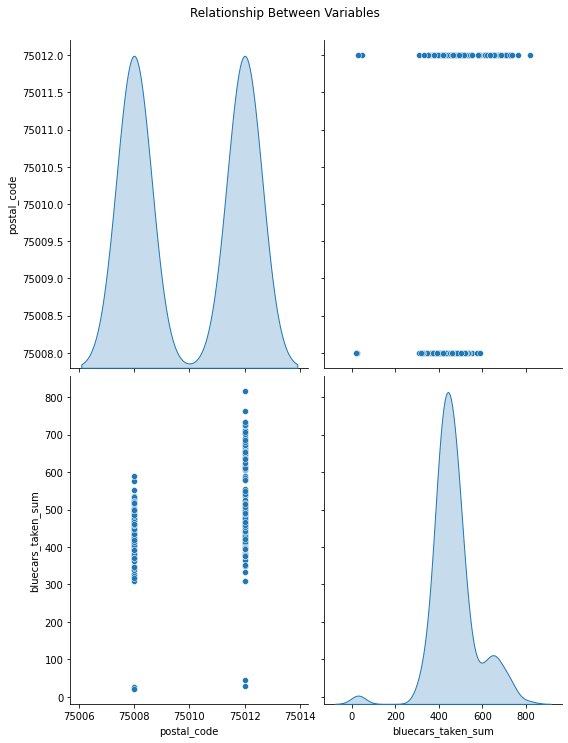

In [43]:
#Pair plot(summary of relationships)
pp = sns.pairplot(autolib_blue, diag_kind='kde', height=5, aspect=0.8, )
pp.fig.suptitle("Relationship Between Variables",  y=1.03)
plt.show()

# 6)Hypothesis Testing

## Categorize the data to weekdays

In [44]:
#Categorize the data to weekdays only
df_weekday = autolib_blue[autolib_blue.index.weekday <= 4]
df_weekday.head()

,postal_code,bluecars_taken_sum
date,,
2018-01-01,75008,309
2018-01-02,75008,349
2018-01-03,75008,422
2018-01-04,75008,430
2018-01-05,75008,426


In [45]:
#Categorize the new df to the indivdual postal codes to allow for the hypothesis testing
#grouping records by zip code to compare the relationship between them in regards to blue cars taken
dfw_p1 = df_weekday[df_weekday['postal_code']== postal_code1]
dfw_p2 = df_weekday[df_weekday['postal_code']== postal_code2]

## Checking the shape

In [46]:
#checking the shape
print(dfw_p1.shape)

(112, 2)


In [47]:
#checking the shape
print(dfw_p2.shape)

(112, 2)


Given the sample size is 112 which is bigger than 30 , we shall carry out a z-test. To be precise a two-tailed Z test since we are checking for change either positive or negative.

A significance of 5% is chosen for the test i.e. α = 0.05

## Two-tailed Z test

In [54]:
#Carrying out the two-tailed Z test:

from scipy import stats
from statsmodels.stats import weightstats as stests



ztest ,pval = stests.ztest(dfw_p1['bluecars_taken_sum'], x2=dfw_p2['bluecars_taken_sum'], value=0,alternative='two-sided')
print(float(pval))

#setting the significance level of 0.05
alpha = 0.05 
if pval < alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9394812769766568
accept null hypothesis


In [49]:
#Two-Sample T-test (Independents test),
from scipy.stats import ttest_ind

dfw_p1_mean = np.mean(dfw_p1['bluecars_taken_sum'])
dfw_p2_mean = np.mean(dfw_p2['bluecars_taken_sum'])
print("75008 mean blue car taken:",dfw_p1_mean)
print("75012 mean blue car taken:",dfw_p2_mean)
print('*'*45)
print('')

dfw_p1_std = np.std(dfw_p1['bluecars_taken_sum'])
dfw_p2_std = np.std(dfw_p2['bluecars_taken_sum'])
print("75008 standard deviation of blue car taken:",dfw_p1_std)
print("75012 standard deviation of blue car taken:",dfw_p2_std)
print('*'*62)
print('')

#setting the significance level of 0.05
alpha = 0.05 
ttest,pval = ttest_ind(dfw_p1['bluecars_taken_sum'],dfw_p2['bluecars_taken_sum'])
print("p-value",pval)
if pval < alpha:
  print("Reject the Null hypothesis")
else:
  print("Accept the null hypothesis")

75008 mean blue car taken: 439.92857142857144
75012 mean blue car taken: 440.58035714285717
*********************************************

75008 standard deviation of blue car taken: 63.557723241738834
75012 standard deviation of blue car taken: 64.35277194507867
**************************************************************

p-value 0.9395496510416727
Accept the null hypothesis


From the Z-test we accept the null hypothesis since the p value > 0.05 which was our chosen significance level. This means that there was no difference between the mean number of blue cars taken in the random selected postal codes 75008 and 75012. We reject the alternate hypothesis that theres is a significant difference in the mean number of blue cars taken in the two postal codes 75008 and 75012